# Neural Networks for Fashion Image Classification and Visual Search

## BT5153 Applied Machine Learning Group Project
#### Authors: Fengzi Li (A0206468Y) | Shashi Kant (A0206456E) | Shunichi Araki (A0206507L) | Sumer Bangera (A0206510X) | Swapna Samir Shukla (A0206512U)*

*All authors are graduate students of MSBA program Class of 2020 at NUS Business School.

### This Notebook searving for: Image Classification

## 1. Loading Kaggle dataset

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "escapingzizi" # username from the json file
os.environ['KAGGLE_KEY'] = "29c04197427ca3bff3b6d0fd8fc243b8" # key from the json file

In [0]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

 96% 545M/565M [00:09<00:00, 42.0MB/s]
100% 565M/565M [00:09<00:00, 64.0MB/s]


In [0]:
! unzip 'fashion-product-images-small.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [0]:
DATASET_PATH = "/content/myntradataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Data Exploration

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
from multiprocessing import Pool
from keras_preprocessing.image import ImageDataGenerator

In [0]:
styles = pd.read_csv('styles.csv',error_bad_lines=False)
styles.head(20)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [0]:
styles.shape

(44424, 10)

In [0]:
styles.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [0]:
styles.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

image name = 52043.jpg, image size = (80, 60, 3), image data type = uint8


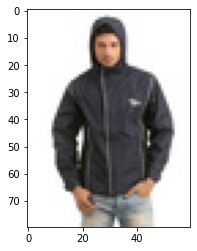

In [0]:
# get basic information of image
fname = random.choice([x for x in os.listdir('images')
               if os.path.isfile(os.path.join('images', x))])
image = mping.imread('images/' + fname)
plt.imshow(image)
print('image name = {}, image size = {}, image data type = {}'.format(fname, image.shape, image.dtype))

In [0]:
# count total number of images
path, dirs, files = next(os.walk('images'))
image_count = len(files)
print('Total number of images = {}, Total number of ID in styles = {}'.format(image_count, styles.shape[0]))

Total number of images = 44441, Total number of ID in styles = 44424


In [0]:
# mapping between images and styles.csv
from multiprocessing import Pool
   
p = Pool(5) # process 5 images simultaneously

image_name = []
for x in os.listdir('images'):
  if os.path.isfile:
    image_path = os.path.join('images', x)
    image_name.append(os.path.basename(image_path))

In [0]:
image_name[:3]

['44027.jpg', '37773.jpg', '53004.jpg']

In [0]:
# convert list to integer
image_number = [i.split('.')[0] for i in image_name]
image_number = [int(i) for i in image_number]
image_number = pd.DataFrame(image_number, columns = ['id'])
image_number.head(3)

,id
0,53476
1,19119
2,58624


In [0]:
# inner join styles dataframe and image_number in images folder
styles_image = pd.merge(styles, image_number, how='inner', on = 'id')
print('Inner joint styles and images dataframe size = {}'.format(styles_image.shape))

Inner joint styles and images dataframe size = (44419, 10)


In [0]:
# add in image name column for ImageDataGenerator
styles_image['image_name'] = styles_image.apply(lambda row: str(row['id']) + '.jpg', axis = 1)

In [0]:
# missing data in styles_image dataframe
styles_image.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
image_name              0
dtype: int64

Text(0, 0.5, 'Count of products')

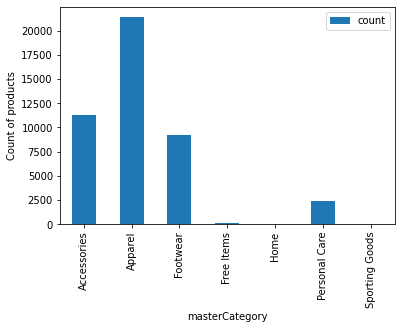

In [0]:
styles_image.groupby(['masterCategory'])['id'].agg(['count']).plot(kind = 'bar')
plt.ylabel('Count of products')

In [0]:
styles_image.groupby(['masterCategory', 'subCategory'])['id'].agg(['count'])

count
masterCategory subCategory                    
Accessories    Accessories                 129
               Bags                       3055
               Belts                       811
               Cufflinks                   108
               Eyewear                    1073
               Gloves                       20
               Headwear                    293
               Jewellery                  1079
               Mufflers                     38
               Perfumes                      1
               Scarves                     118
               Shoe Accessories             24
               Socks                       686
               Sports Accessories            3
               Stoles                       90
               Ties                        258
               Umbrellas                     6
               Wallets                     933
               Watches                    2542
               Water Bottle                  7
Apparel        Apparel Set                 106
               Bottomwear                 2693
               Dress                       478
               Innerwear                  1808
               Loungewear and Nightwear    470
               Saree                       427
               Socks                        12
               Topwear                   15398
Footwear       Flip Flops                  913
               Sandal                      963
               Shoes                      7343
Free Items     Free Gifts                  104
               Vouchers                      1
Home           Home Furnishing               1
Personal Care  Bath and Body                12
               Beauty Accessories            4
               Eyes                         43
               Fragrance                  1011
               Hair                         19
               Lips                        527
               Makeup                      307
               Nails                       329
               Perfumes                      5
               Skin                         69
               Skin Care                    77
Sporting Goods Sports Equipment             21
               Wristbands                    4

In [0]:
# illustrate different masterCategory
sample_list = styles_image.groupby(['masterCategory']).apply(lambda x: x.sample(n=5, replace=True))
sample_list

id  gender  ... image_name subcat_count
masterCategory                       ...                        
Accessories    41710   3381   Women  ...   3381.jpg         3055
               41294  12746     Men  ...  12746.jpg          118
               15210  33726   Women  ...  33726.jpg          811
               27235  47390   Women  ...  47390.jpg         3055
               4628   57536     Men  ...  57536.jpg          811
Apparel        34150  10350   Women  ...  10350.jpg        15398
               27147  56229     Men  ...  56229.jpg          470
               33583  53039   Women  ...  53039.jpg          427
               15468  48489   Women  ...  48489.jpg        15398
               24156  14290     Men  ...  14290.jpg        15398
Footwear       4412   31976   Women  ...  31976.jpg         7343
               12188  19879   Women  ...  19879.jpg          913
               35403   3652     Men  ...   3652.jpg         7343
               1383   47196     Men  ...  47196.jpg          963
               26563   6624     Men  ...   6624.jpg         7343
Free Items     14758  57600   Women  ...  57600.jpg          104
               39682  36777     Men  ...  36777.jpg          104
               19320  44965     Men  ...  44965.jpg          104
               23953  53568  Unisex  ...  53568.jpg          104
               34353  25088     Men  ...  25088.jpg          104
Home           12229  40826  Unisex  ...  40826.jpg            1
               12229  40826  Unisex  ...  40826.jpg            1
               12229  40826  Unisex  ...  40826.jpg            1
               12229  40826  Unisex  ...  40826.jpg            1
               12229  40826  Unisex  ...  40826.jpg            1
Personal Care  11699  44024   Women  ...  44024.jpg         1011
               9504   55575   Women  ...  55575.jpg          307
               14014  55159   Women  ...  55159.jpg          329
               29220  56568   Women  ...  56568.jpg          307
               14875  26207   Women  ...  26207.jpg         1011
Sporting Goods 14506   1552  Unisex  ...   1552.jpg           21
               35928   1550  Unisex  ...   1550.jpg           21
               42247   1628  Unisex  ...   1628.jpg           21
               9247    2354  Unisex  ...   2354.jpg           21
               5052   13670  Unisex  ...  13670.jpg           21

[35 rows x 12 columns]

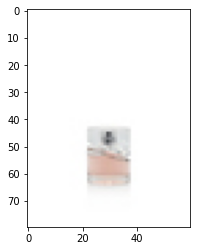

In [0]:
# random select a image to show
samples = []
keys = []
for i in sample_list['id']:
  samples.append(i)
  
j = random.randrange(len(samples))
image = mping.imread('images/' + str(samples[j]) + '.jpg')
plt.imshow(image)

In [0]:
master_cat_name = list(styles_image.groupby(['masterCategory']).groups.keys())
master_cat_name

['Accessories',
 'Apparel',
 'Footwear',
 'Free Items',
 'Home',
 'Personal Care',
 'Sporting Goods']

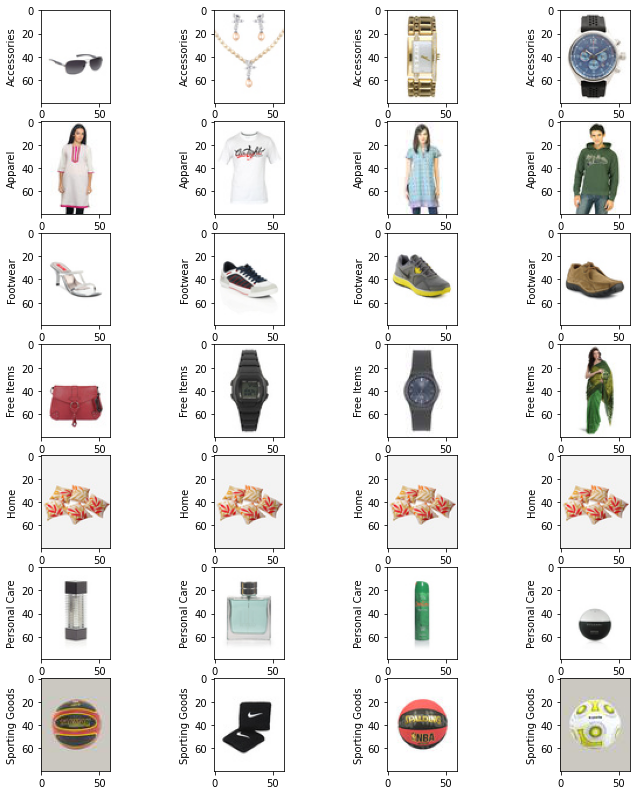

In [0]:
# for each masterCategory randomly select 5 (columns) images for illustration
fig = plt.figure(figsize=(15,14))
columns = 5
rows = 7

for j in range(0, rows):
  for i in range(columns*(j+1)-4, columns*(j+1)):
    image = mping.imread('images/' + str(samples[i-1]) + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.ylabel(str(master_cat_name[j]))
plt.show()

## 3. Selection subset of dataset

#### Three schemes to conduct product classification for e-commerce

- by gender+masterCategory
- by subCategory
- by articleType

### 3.1 Selection subset of dataset - By subCategory

As seen from the subcategory groupby dataframe, subcategory item counts vary from Perfumes with only 1 product to Topwear of 15398 products. It is highly imbalanced. We specify a thredhold to filter the main subcategories. ***subCategory with product count >= 500 is considered.***

In [0]:
# Selection of subset of data
styles_image['subcat_count'] = styles_image.groupby(['masterCategory', 'subCategory'])['id'].transform('count')
print(styles_image.shape)
styles_image.head(5)

(44419, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398


In [0]:
subcategory_df_train = styles_image[styles_image['subcat_count'] >= 500].sample(frac=0.8, random_state=123)
subcategory_df_test = styles_image[styles_image['subcat_count'] >= 500].drop(subcategory_df_train.index)
subcategory_num_select = styles_image[styles_image['subcat_count'] >= 500].groupby(['subCategory']).count().iloc[:,0]
subcategory_samples = styles_image[styles_image['subcat_count'] >= 500].shape[0]

print('total number of samples after selection', subcategory_samples)
print('total number of subcateogry classes after selecton', len(subcategory_num_select))
print('total number of subcategory product counts after selecton',subcategory_num_select)

total number of samples after selection 40835
total number of subcateogry classes after selecton 15
total number of subcategory product counts after selecton subCategory
Bags           3055
Belts           811
Bottomwear     2693
Eyewear        1073
Flip Flops      913
Fragrance      1011
Innerwear      1808
Jewellery      1079
Lips            527
Sandal          963
Shoes          7343
Socks           686
Topwear       15398
Wallets         933
Watches        2542
Name: id, dtype: int64


In [0]:
subcategory_num_original = styles_image.groupby(['subCategory']).count().iloc[:,0]
print('total number of samples before selection', styles_image.shape[0])
print('total number of subcateogry classes before selecton', len(subcategory_num_original))
print('total number of subcateogry product counts before selecton', subcategory_num_original)

total number of samples before selection 44419
total number of subcateogry classes before selecton 45
total number of subcateogry product counts before selecton subCategory
Accessories                   129
Apparel Set                   106
Bags                         3055
Bath and Body                  12
Beauty Accessories              4
Belts                         811
Bottomwear                   2693
Cufflinks                     108
Dress                         478
Eyes                           43
Eyewear                      1073
Flip Flops                    913
Fragrance                    1011
Free Gifts                    104
Gloves                         20
Hair                           19
Headwear                      293
Home Furnishing                 1
Innerwear                    1808
Jewellery                    1079
Lips                          527
Loungewear and Nightwear      470
Makeup                        307
Mufflers                       38
Nails      

Text(0.5, 1.0, 'SubCategory after selection')

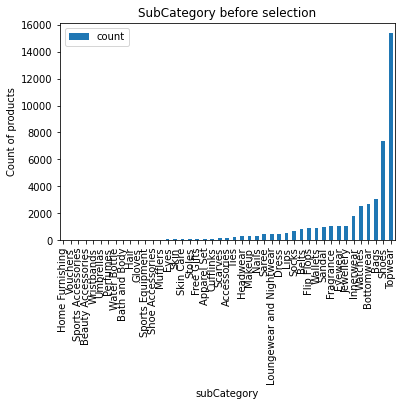

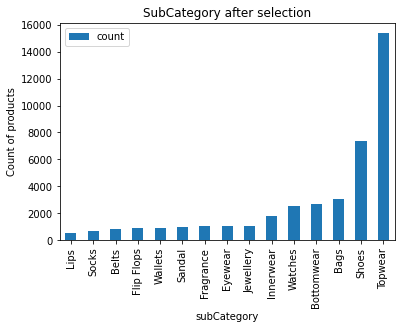

In [0]:
# Product counts for multiclass before clipping and after clipping
# plt.figure(figsize=(10,10))
styles_image.groupby(['subCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('SubCategory before selection')

styles_image[styles_image['subcat_count'] >= 500].groupby(['subCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('SubCategory after selection')

### 3.2 Selection subset of dataset - By articleType

As seen from the articleType groupby dataframe, articleType product counts vary from Wristbands with 7 product to Tshirts of 7065 products. It is highly imbalanced. We specify a thredhold to filter the main subcategories. ***articleType with product count >= 500 is considered.***

In [0]:
# Selection of subset of data
styles_image['articleType_count'] = styles_image.groupby(['masterCategory', 'subCategory', 'articleType'])['id'].transform('count')
print(styles_image.shape)
styles_image.head(5)

(44419, 13)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count,articleType_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398,3215
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693,608
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542,2542
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693,304
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398,7065


In [0]:
articleType_df_train = styles_image[styles_image['articleType_count'] >= 500].sample(frac=0.8, random_state=123)
articleType_df_test = styles_image[styles_image['articleType_count'] >= 500].drop(articleType_df_train.index)

article_num_select = styles_image[styles_image['articleType_count'] >= 500].groupby(['articleType']).count().iloc[:,0]
articleType_samples = styles_image[styles_image['articleType_count'] >= 500].shape[0]

print('total number of samples after selection', articleType_samples)
print('total number of articleType classes after selecton', len(article_num_select))
print('total number of articleType product counts after selecton',article_num_select)

total number of samples after selection 34697
total number of articleType classes after selecton 23
total number of articleType product counts after selecton articleType
Backpacks                 722
Belts                     810
Briefs                    849
Casual Shoes             2845
Flats                     500
Flip Flops                913
Formal Shoes              637
Handbags                 1757
Heels                    1323
Jeans                     608
Kurtas                   1844
Perfume and Body Mist     607
Sandals                   895
Shirts                   3215
Shorts                    545
Socks                     686
Sports Shoes             2036
Sunglasses               1073
Tops                     1762
Trousers                  530
Tshirts                  7065
Wallets                   933
Watches                  2542
Name: id, dtype: int64


In [0]:
article_num_original = styles_image.groupby(['articleType']).count().iloc[:,0]
print('total number of articleType classes before selecton', len(article_num_original))
print('total number of articleType product counts before selecton', article_num_original)

total number of articleType classes before selecton 142
total number of articleType product counts before selecton articleType
Accessory Gift Set      97
Baby Dolls              16
Backpacks              724
Bangle                  85
Basketballs             13
                      ... 
Waistcoat               15
Wallets                936
Watches               2542
Water Bottle            11
Wristbands               7
Name: id, Length: 142, dtype: int64


Text(0.5, 1.0, 'articleType after selection')

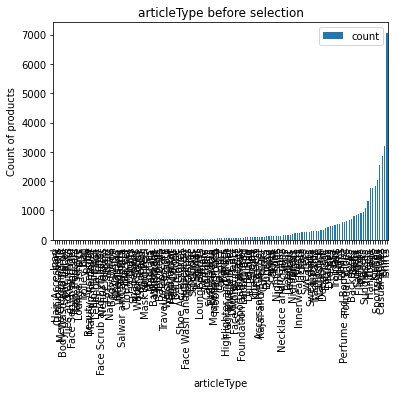

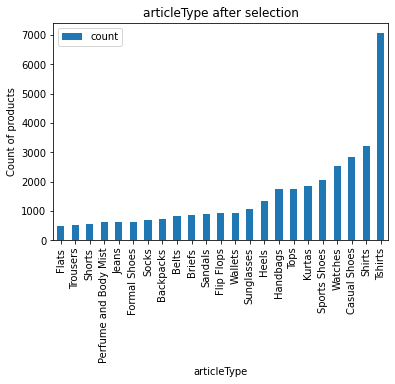

In [0]:
styles_image.groupby(['articleType'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('articleType before selection')

styles_image[styles_image['articleType_count'] >= 500].groupby(['articleType'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('articleType after selection')

### 3.3 Selection subset of dataset - By gender+masterCategory

In [0]:
# Selection of subset of data
styles_image['gender_masterCategory'] = styles_image['gender'] + styles_image['masterCategory']
print(styles_image.shape)
styles_image.head(5)

(44419, 14)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count,articleType_count,gender_masterCategory
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398,3215,MenApparel
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693,608,MenApparel
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542,2542,WomenAccessories
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693,304,MenApparel
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398,7065,MenApparel


In [0]:
# Selection of subset of data
styles_image['genderMasterCategory_count'] = styles_image.groupby(['gender_masterCategory'])['id'].transform('count')
print(styles_image.shape)
styles_image.head(5)

(44419, 15)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count,articleType_count,gender_masterCategory,genderMasterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398,3215,MenApparel,11347
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693,608,MenApparel,11347
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542,2542,WomenAccessories,5320
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693,304,MenApparel,11347
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398,7065,MenApparel,11347


In [0]:
genderMaster_df_train = styles_image[styles_image['genderMasterCategory_count'] >= 500].sample(frac=0.8, random_state=123)
genderMaster_df_test = styles_image[styles_image['genderMasterCategory_count'] >= 500].drop(genderMaster_df_train.index)

genderMaster_num_select = styles_image[styles_image['genderMasterCategory_count'] >= 500].groupby(['gender_masterCategory']).count().iloc[:,0]
genderMaster_samples = styles_image[styles_image['genderMasterCategory_count'] >= 500].shape[0]

print('total number of samples after selection', genderMaster_samples)
print('total number of gender+masterCategory classes after selecton', len(genderMaster_num_select))
print('total number of gender+masterCategory product counts after selecton',genderMaster_num_select)

total number of samples after selection 44018
total number of gender+masterCategory classes after selecton 12
total number of gender+masterCategory product counts after selecton gender_masterCategory
BoysApparel             759
GirlsApparel            567
MenAccessories         4412
MenApparel            11347
MenFootwear            5751
MenPersonal Care        579
UnisexAccessories      1497
UnisexFootwear          518
WomenAccessories       5320
WomenApparel           8623
WomenFootwear          2836
WomenPersonal Care     1809
Name: id, dtype: int64


In [0]:
genderMaster_num_original = styles_image.groupby(['gender_masterCategory']).count().iloc[:,0]
print('total number of articleType classes before selecton', len(genderMaster_num_original))
print('total number of articleType product counts before selecton', genderMaster_num_original)

total number of articleType classes before selecton 23
total number of articleType product counts before selecton gender_masterCategory
BoysAccessories            17
BoysApparel               759
BoysFootwear               54
GirlsAccessories           28
GirlsApparel              567
GirlsFootwear              60
MenAccessories           4412
MenApparel              11347
MenFootwear              5751
MenFree Items              53
MenPersonal Care          579
UnisexAccessories        1497
UnisexApparel              96
UnisexFootwear            518
UnisexFree Items            9
UnisexHome                  1
UnisexPersonal Care        15
UnisexSporting Goods       25
WomenAccessories         5320
WomenApparel             8623
WomenFootwear            2836
WomenFree Items            43
WomenPersonal Care       1809
Name: id, dtype: int64


Text(0.5, 1.0, 'gender_masterCategory after selection')

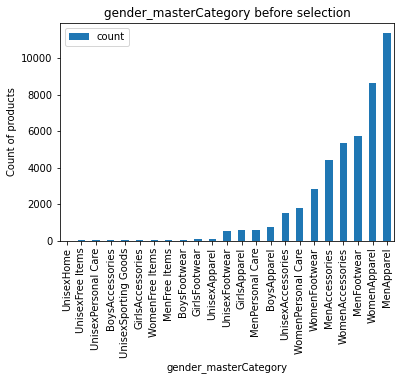

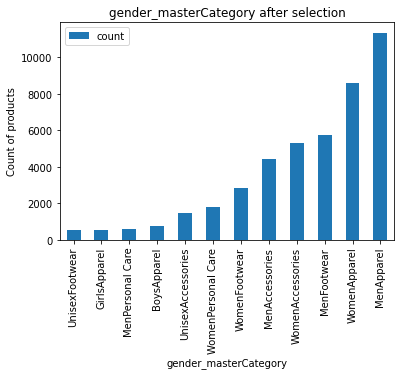

In [0]:
styles_image.groupby(['gender_masterCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('gender_masterCategory before selection')

styles_image[styles_image['genderMasterCategory_count'] >= 500].groupby(['gender_masterCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('gender_masterCategory after selection')

## 4. Train, Validation and Test split of data set

#### Solving an imbalance class problem for image classification 
- Applying Data Augmentation
- SMOTE (synthetic Minority Over-sampling Technique)
- Weighted Class Approach
- Under-sampling Approach

***Class_weight:***
Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class. For our current problem, it does not show good improvement. To keep a simple model, we will not use this in our proposed model. 

***SMOTE*** function requires input with (samples, features) so we need to reshape original 4D imgage format (samples, height, width, channels) into (samples, height*width*channels) which causes RAM capacity problem.

***Under-sampling*** can not make full use of available dataset, we will not use this in our proposed model.

### Data Augmentation and DataGenerator Function

The ImageDataGenerator  class will return just the randomly transformed data. This is to ensure that the network sees “new” images that it has never “seen” before at each and every epoch.

In [0]:
# defind image generator for batch imgae loading and labelling
# flow_from function parameters explanation can refer to: https://keras.io/preprocessing/image/

def data_augment(train_dataframe, test_dataframe, sel_y_col, num_samples):
    '''
    This function is used to apply data augmentation and prepare ImageDataGenerator for train,validation and test
    Input argument:
    dataframe: subset of dataset after selection in the previous section
    y_col: specify the label
    num_samples: total nunmber of samples for the input dataframe
    '''

    batch_size = 32
    image_width = image.shape[0]
    image_height = image.shape[1]

    # imbalance dataset, apply data augumentation:
    image_generator_train = ImageDataGenerator(rescale=1./255,
                                              rotation_range=40,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              fill_mode='nearest',
                                              validation_split = 0.2)

    image_generator_test = ImageDataGenerator(rescale=1./255)

    training_generator = image_generator_train.flow_from_dataframe(
        dataframe = train_dataframe,
        directory = 'images',
        x_col = 'image_name', # image .jpg name
        y_col = sel_y_col, #'subCategory',  #'articleType',#'masterCategory', # label, total 7 classes; can try subCategory 44 classes
        target_size = (image_width,image_height), # original image size =(80,60,3)
        batch_size = batch_size, # default value
        shuffle = True,
        class_mode = 'categorical',
        subset = 'training'
        #seed = 123
    )

    validation_generator = image_generator_train.flow_from_dataframe(
        dataframe = train_dataframe, #subcategory_df_train,
        directory = 'images',
        x_col = 'image_name',
        y_col = sel_y_col, #'subCategory',  #'articleType', #'masterCategory',
        target_size = (image_width,image_height),
        batch_size = batch_size,
        shuffle = True,
        class_mode = 'categorical',
        subset = 'validation'
        #seed=123
    )

    classes_train = len(training_generator.class_indices) 

    test_generator = image_generator_test.flow_from_dataframe(
        dataframe = test_dataframe, #subcategory_df_test,
        directory = 'images',
        x_col = 'image_name',
        y_col = sel_y_col, #'subCategory',   #'articleType', #'masterCategory',
        target_size = (image_width,image_height),
        batch_size = batch_size,
        shuffle = True,
        class_mode = 'categorical'
        #seed=123
    )

    n_classes = len(test_generator.class_indices)
    print('total number of subset samples', num_samples)
    print('total number of class', n_classes)

    return training_generator, validation_generator, test_generator, n_classes

### 4.1 articleType Classification

In [0]:
# for articleType Classification
training_generator, validation_generator, test_generator, n_classes = data_augment(articleType_df_train,
                                                                                   articleType_df_test,
                                                                                   'articleType', 
                                                                                   articleType_samples)

Found 22207 validated image filenames belonging to 23 classes.
Found 5551 validated image filenames belonging to 23 classes.
Found 6939 validated image filenames belonging to 23 classes.
total number of subset samples 34697
total number of class 23


In [0]:
batch_size = 32
training_samples = len(training_generator.filenames)
validation_samples = len(validation_generator.filenames)
test_samples = len(test_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, validation_samples, test_samples, total_steps)

# test accuracy for augmentation data = 0.761388

22207 5551 6939 693


### 4.2 subCategory Classification

Class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class

In [0]:
# for subCategory Classification
training_generator, validation_generator, test_generator, n_classes = data_augment(subcategory_df_train,
                                                                                   subcategory_df_test,
                                                                                   'subCategory', 
                                                                                   subcategory_samples)

Found 26135 validated image filenames belonging to 15 classes.
Found 6533 validated image filenames belonging to 15 classes.
Found 8167 validated image filenames belonging to 15 classes.
total number of subset samples 40835
total number of class 15


In [0]:
batch_size = 32
training_samples = len(training_generator.filenames)
validation_samples = len(validation_generator.filenames)
test_samples = len(test_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, validation_samples, test_samples, total_steps)

26135 6533 8167 816


### 4.3 gender+masterCategory Classification

SMOTE function requires input with (samples, features) so we need to reshape original 4D imgage format (samples, height, width, channels) into (samples, height*width*channels) which causes RAM capacity problem.

In [0]:
# for gender+masterCategory Classification
training_generator, validation_generator, test_generator, n_classes = data_augment(genderMaster_df_train,
                                                                                   genderMaster_df_test,
                                                                                   'gender_masterCategory', 
                                                                                   genderMaster_samples)

Found 28172 validated image filenames belonging to 12 classes.
Found 7042 validated image filenames belonging to 12 classes.
Found 8804 validated image filenames belonging to 12 classes.
total number of subset samples 44018
total number of class 12


In [0]:
batch_size = 32
training_samples = len(training_generator.filenames)
validation_samples = len(validation_generator.filenames)
test_samples = len(test_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, validation_samples, test_samples, total_steps)

28172 7042 8804 880


## 5. Transfer Learning using VGG19

In [0]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
# from keras.models import Model, load_model
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from keras import models
from keras import layers
from keras import optimizers

In [0]:
# Create the base model of VGG19
batch_size = 32
image_width = image.shape[0]
image_height = image.shape[1]

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (image_width, image_height, 3), pooling='max', classes = n_classes)
train_layers = 5 # train_layers = 5 for articleType test accuracy = 0.8514

for layer in vgg19.layers[:-1*train_layers]:
    layer.trainable = False

for layer in vgg19.layers:
    print(layer, layer.trainable)

80142336/80134624 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f9584c01a58> False
<keras.layers.convolutional.Conv2D object at 0x7f9584c01128> False
<keras.layers.convolutional.Conv2D object at 0x7f9584c01470> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9584c01518> False
<keras.layers.convolutional.Conv2D object at 0x7f958711c048> False
<keras.layers.convolutional.Conv2D object at 0x7f9587116940> False
<keras.layers.pooling.MaxPooling2D object at 0x7f95848f7b70> False
<keras.layers.convolutional.Conv2D object at 0x7f95848f79b0> False
<keras.layers.convolutional.Conv2D object at 0x7f95848fe6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f95848fee48> False
<keras.layers.convolutional.Conv2D object at 0x7f9584905cc0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f958490b748> False
<keras.layers.convolutional.Conv2D object at 0x7f958490b588> False
<keras.layers.convolutional.Conv2D object at 0x7f95849129b0> F

In [0]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from tensorflow.keras import backend

# define transfer learning mdoel
# backend.clear_session() -- don't use this!!!

transfer_model = Sequential()
for layer in vgg19.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(512, activation="relu")) 
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(n_classes, activation="softmax")) 

from keras import optimizers
adam = optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
#rmsprop = optimizers.RMSprop(lr=1e-3)

transfer_model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 80, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 15, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 20, 15, 256)      

#### Regularization Technique
- parameter norm penalities: but properties change when combined with other regularizers
- early stopping: always do this
- weight sharing: already done implicitly through convolution
- drop-out: (almost) always used
- data augmentation: always do this; select technique apropos to source and application
- noise injection: more common for RNNs
- batch normalization: try and see if it helps. more often but not always

## 6. articleType Classification Model

### 6.1 Model Training

In [0]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# save_model_name = 'vgg19_transfer_subcat.h5'
save_model_name = 'vgg19_transfer_articleType.h5'
filepath = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
start = time.time()
vgg19_history = transfer_model.fit_generator(training_generator, steps_per_epoch=training_samples // batch_size,
                                            epochs=50,
                                            validation_data=validation_generator,
                                            validation_steps=validation_samples // batch_size, # class_weight = class_weights,
                                            callbacks=[earlyStopping, best_model, reduce_lr_loss]) 
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Epoch 1/50
693/693 [==============================] - 68s 99ms/step - loss: 1.9124 - accuracy: 0.4329 - val_loss: 1.2974 - val_accuracy: 0.6781

Epoch 00001: val_accuracy improved from -inf to 0.67811, saving model to /content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/vgg19_transfer_articleType.h5
Epoch 2/50
693/693 [==============================] - 63s 91ms/step - loss: 1.0595 - accuracy: 0.6592 - val_loss: 0.7026 - val_accuracy: 0.7543

Epoch 00002: val_accuracy improved from 0.67811 to 0.75430, saving model to /content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/vgg19_transfer_articleType.h5
Epoch 3/50
693/693 [==============================] - 63s 90ms/step - loss: 0.8598 - accuracy: 0.7141 - val_loss: 0.7893 - val_accuracy: 0.7826

Epoch 00003: val_accuracy improved from 0.75430 to 0.78257, saving model to /content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/vgg19_transfer_articleType.h5
Epoch 4/50
693/693 [==============================] 

In [0]:
# plot train and valid loss history

def plot_acc_loss(history):
    # plot train and valid loss history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epoch_number = range(len(acc))
    plt.figure(figsize=(6, 6), dpi=100)
    plt.subplot(2,1,1)
    plt.plot(epoch_number, acc, 'r', label='train acc')
    plt.plot(epoch_number, val_acc, 'b', label='val acc')
    plt.title('Train and Validation Accuracy')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(epoch_number, loss, 'r', label='train loss')
    plt.plot(epoch_number, val_loss, 'b', label='val loss')
    plt.title('Train and Validation Loss')
    plt.legend()

    plt.show()

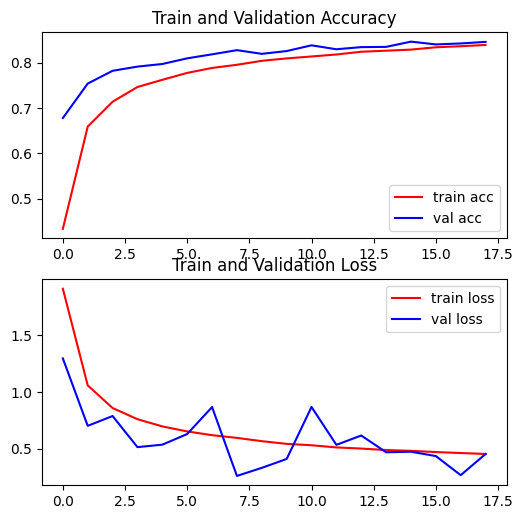

In [0]:
# plot train and valid loss history 
vgg19_valid_acc_plot = plot_acc_loss(vgg19_history)

In [0]:
# evaluate model, return loss & metrics values in the test mode
transfer_model.evaluate(validation_generator)

174/174 [==============================] - 12s 68ms/step


[0.8585034608840942, 0.8412898778915405]

In [0]:
# getting validation fitting results
valid_fit = transfer_model.predict(validation_generator)
valid_fit.shape

(5551, 23)

In [0]:
# calculate the prediction class result
import math

def pred_class(input_probs):
  class_top1 = []
  index_top1 = np.argmax(input_probs, axis = 1)
  class_top1 = (index_top1 + 1)
  return class_top1

def acc_cal(pred, truth):
  accuracy_class = int((pred == truth).sum())/ int(len(truth))
  return accuracy_class

def truth_labels(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    labels_list = []
    for i in range(0,int(number_of_generator_calls)):
        labels_list.extend(np.array(generator[i][1]))
    return labels_list

In [0]:
# actual results instead of multiple class prediction
valid_labels = truth_labels(validation_generator, batch_size)

valid_top1 = pred_class(valid_fit)
y_val_truth = pred_class(valid_labels)
acc_valid = acc_cal(valid_top1, y_val_truth)

print('Validation accuracy and prediction')
print(valid_top1.shape, y_val_truth.shape, acc_valid)

import random
mask = random.sample(range(0, validation_samples), 24)
print(valid_top1[mask])
print(y_val_truth[mask])

Validation accuracy and prediction
(5551,) (5551,) 0.8409295622410377
[16 21 22 21  6  4 13 17  1 14 18 17 13  9 11  4  5  4 10 19 12 12  4 21]
[16 21 22 21  6  4 13 17  1 14 18 17 13  9 11  4  5  4 10 21 12 12  4 21]


In [0]:
# prediction for test dataset
test_pred = transfer_model.predict(test_generator)

In [0]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, batch_size)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, test_samples), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(6939,) (6939,) 0.8730364605850988
[ 4 18 23  4 10 21 14  4 19  4 16 21  4 14 23  9 14 21  9  7 21 14  3 18]
[ 4 18 23  4 20 21 14  4 19  4 16 21  4 21 23  9 14 21  9  7 21 14  3 18]


In [0]:
# test dataset accuracy
transfer_model.evaluate(test_generator)

217/217 [==============================] - 7s 34ms/step


[0.6878738403320312, 0.8730364441871643]

#### Load saved best model

In [0]:
# load best model - step1 load vgg19 then run transfer_model
#transfer_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/vgg19_transfer_articleType.h5')

### 6.2 Evaluation of Model

#### Confusion Matrix

By definition a confusion matrix C is such that C_i,j is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification, the count of true negatives is C_0,0, false negatives is C_1,0, true positives is C_1,1 and false positives is C_0,1.

In [0]:
# test dataset accuracy
transfer_model.evaluate(test_generator)

217/217 [==============================] - 7s 34ms/step


[0.5234501957893372, 0.8730364441871643]

In [0]:
# confusion matrix for multiclass prediction results
# del test_pred, test_true
test_pred = transfer_model.predict(test_generator)
test_true = truth_labels(test_generator, batch_size)
classes = validation_generator.class_indices
test_pred_top1 = pred_class(test_pred)
test_true_top1 = pred_class(test_true)
acc_test = acc_cal(test_pred_top1, test_true_top1)
print('Test accuracy = ',acc_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_true_top1, test_pred_top1)
print('Confusion matrix for test dataset')
print(cnf_matrix)

Test accuracy =  0.8730364605850988
Confusion matrix for test dataset
[[ 147    0    0    1    0    0    0    3    0    0    0    1    0    0
     0    0    1    0    0    0    0    0    0]
 [   0  154    0    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0  148    0    0    0    0    1    0    0    0    0    0    0
     1    0    0    0    6    1    4    1    0]
 [   0    1    0  484    2    4   18    0    7    0    0    0   11    0
     0    0   48    1    0    0    0    0    0]
 [   0    2    0    4    4   22    0    1   52    0    0    0    8    0
     0    1    1    0    0    0    0    0    0]
 [   0    0    0    2    0  182    0    0    3    0    0    0    1    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0   23    0    0   99    0    0    0    0    0    2    0
     0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0  329    0    0    0    0    0    0
     0    0    1  

In [0]:
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.72)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


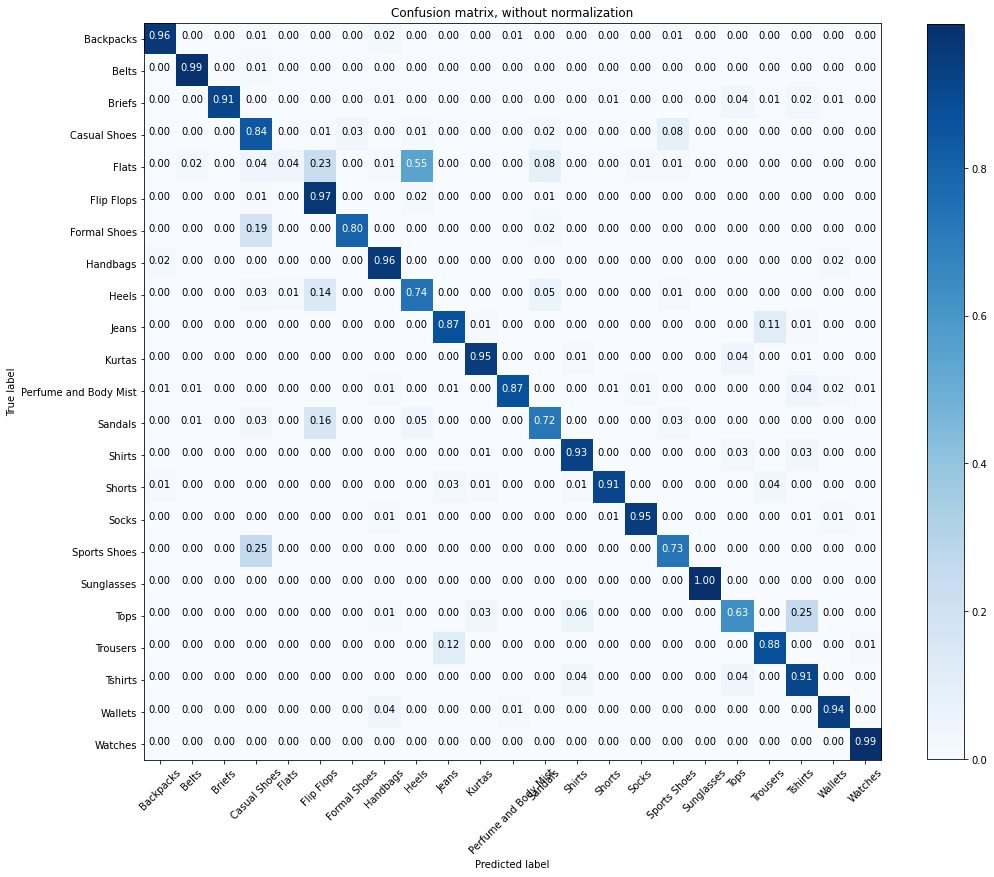

In [0]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix, without normalization')

#### Precision_Recall_Curve

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# Precision and Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def precision_recall_cal(test_true, test_pred, n_classes):
    test_true = np.array(test_true)
    test_true = test_true.reshape(test_true.shape[0], n_classes)
    n_classes = len(classes)

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_true[:, i],
                                                            test_pred[:, i])
        average_precision[i] = average_precision_score(test_true[:, i], test_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_true.ravel(),
        test_pred.ravel())
    average_precision["micro"] = average_precision_score(test_true, test_pred,
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))
    
    return precision, recall, average_precision

In [0]:
precision, recall, average_precision = precision_recall_cal(test_true, test_pred, n_classes)

Average precision score, micro-averaged over all classes: 0.95


In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

def precision_recall_curve(precision, recall, average_precision):

    from itertools import cycle
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(1, 0), prop=dict(size=14))


    plt.show()

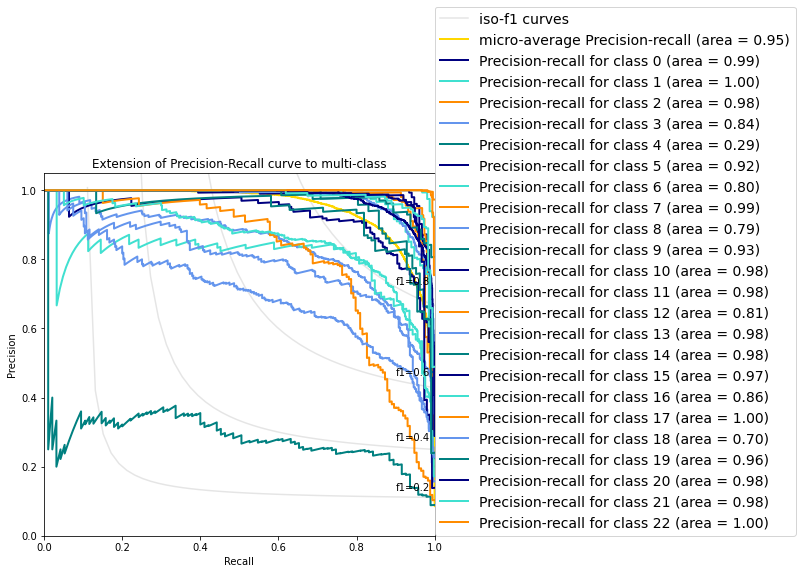

In [0]:
precision_recall_curve(precision, recall, average_precision)

In [0]:
classes

{'Backpacks': 0,
 'Belts': 1,
 'Briefs': 2,
 'Casual Shoes': 3,
 'Flats': 4,
 'Flip Flops': 5,
 'Formal Shoes': 6,
 'Handbags': 7,
 'Heels': 8,
 'Jeans': 9,
 'Kurtas': 10,
 'Perfume and Body Mist': 11,
 'Sandals': 12,
 'Shirts': 13,
 'Shorts': 14,
 'Socks': 15,
 'Sports Shoes': 16,
 'Sunglasses': 17,
 'Tops': 18,
 'Trousers': 19,
 'Tshirts': 20,
 'Wallets': 21,
 'Watches': 22}

## 7. subCategory Classification Model

### 7.1 Model Training

In [0]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_model_name = 'vgg19_transfer_subcat.h5'
# save_model_name = 'vgg19_transfer_articleType.h5'
# filepath = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/'
filepath = '/content/gdrive/My Drive/BT5153_AML_Group_Project/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
start = time.time()
vgg19_history = transfer_model.fit_generator(training_generator, steps_per_epoch=training_samples // batch_size,
                                            epochs=50,
                                            validation_data=validation_generator,
                                            validation_steps=validation_samples // batch_size, # class_weight = class_weights,
                                            callbacks=[earlyStopping, best_model, reduce_lr_loss]) 
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Epoch 1/50
816/816 [==============================] - 57s 70ms/step - loss: 0.3455 - accuracy: 0.8915 - val_loss: 0.2939 - val_accuracy: 0.9112

Epoch 00001: val_accuracy improved from -inf to 0.91115, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_subcat.h5
Epoch 2/50
816/816 [==============================] - 58s 71ms/step - loss: 0.3053 - accuracy: 0.9035 - val_loss: 0.0662 - val_accuracy: 0.9151

Epoch 00002: val_accuracy improved from 0.91115 to 0.91509, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_subcat.h5
Epoch 3/50
816/816 [==============================] - 57s 70ms/step - loss: 0.2829 - accuracy: 0.9088 - val_loss: 0.1515 - val_accuracy: 0.9259

Epoch 00003: val_accuracy improved from 0.91509 to 0.92586, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_subcat.h5
Epoch 4/50
816/816 [==============================] - 57s 70ms/step - loss: 0.2657 - accuracy: 0.9165 - val_loss: 0

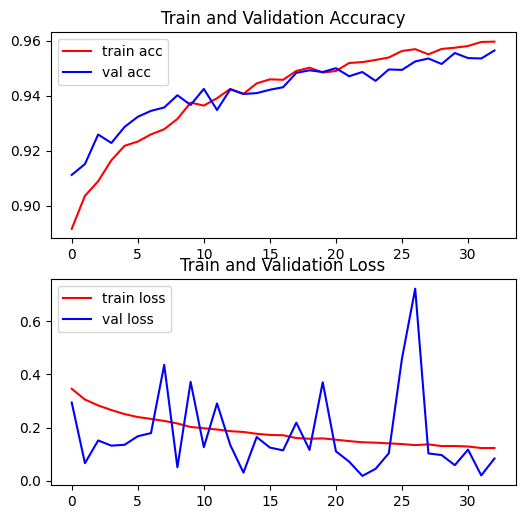

In [0]:
# plot train and valid loss history 
vgg19_valid_acc_plot = plot_acc_loss(vgg19_history)

In [0]:
# evaluate model, return loss & metrics values in the test mode
transfer_model.evaluate(validation_generator)

205/205 [==============================] - 11s 53ms/step


[0.014792652800679207, 0.957446813583374]

In [0]:
# prediction for test dataset
test_pred = transfer_model.predict(test_generator)

In [0]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, batch_size)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, test_samples), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(8167,) (8167,) 0.9655932410922003
[ 1  1  3 15  5  1  3 11 14  8  3 15 13  1  2  1 11 13 11 13  3 15  6 13]
[ 1  1  3 15 10  1  3 11 14  8  3 15 13  1  2  1 11 13 11 13  3 15  6 13]


In [0]:
# test dataset accuracy
transfer_model.evaluate(test_generator)

256/256 [==============================] - 5s 18ms/step


[0.002221339149400592, 0.9655932188034058]

### 7.2 Evaluation of Model

#### Confusion Matrix

In [0]:
# confusion matrix for multiclass prediction results
# del test_pred, test_true
test_pred = transfer_model.predict(test_generator)
test_true = truth_labels(test_generator, batch_size)
classes = validation_generator.class_indices
test_pred_top1 = pred_class(test_pred)
test_true_top1 = pred_class(test_true)
acc_test = acc_cal(test_pred_top1, test_true_top1)
print('Test accuracy = ',acc_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_true_top1, test_pred_top1)
print('Confusion matrix for test dataset')
print(cnf_matrix)

Test accuracy =  0.9655932410922003
Confusion matrix for test dataset
[[ 602    1    0    0    0    0    0    1    0    0    0    0    4   21
     1]
 [   6  149    0    0    0    0    0    3    0    0    0    0    0    0
     0]
 [   2    0  533    0    0    0    2    0    0    0    0    0    5    1
     1]
 [   0    0    0  232    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0  167    0    0    1    0    2    9    0    1    0
     0]
 [   4    0    1    0    0  175    0    8    2    0    0    1    1    1
    10]
 [   0    0    5    0    0    0  327    0    0    0    0    0   27    0
     0]
 [   3    1    1    0    0    1    0  199    2    0    1    0    1    0
     1]
 [   1    0    0    0    0    1    0    0   94    0    0    0    2    0
     0]
 [   0    0    0    0   29    0    0    0    0  134   19    0    0    0
     0]
 [   3    0    0    0   13    0    0    1    0   22 1467    0    0    0
     0]
 [   3    0    2    0    1    0    0    0    0    

Normalized confusion matrix


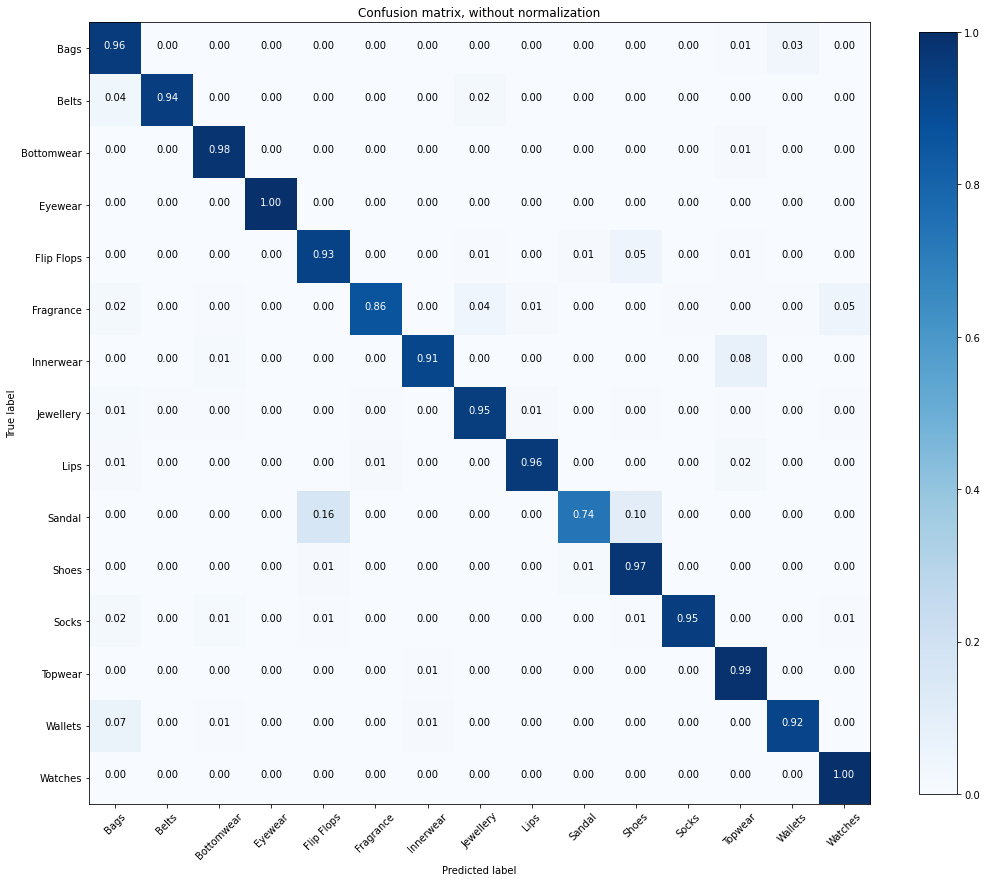

In [0]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix, without normalization')

#### Precision_Recall_Curve

In [0]:
precision, recall, average_precision = precision_recall_cal(test_true, test_pred, n_classes)

Average precision score, micro-averaged over all classes: 0.99


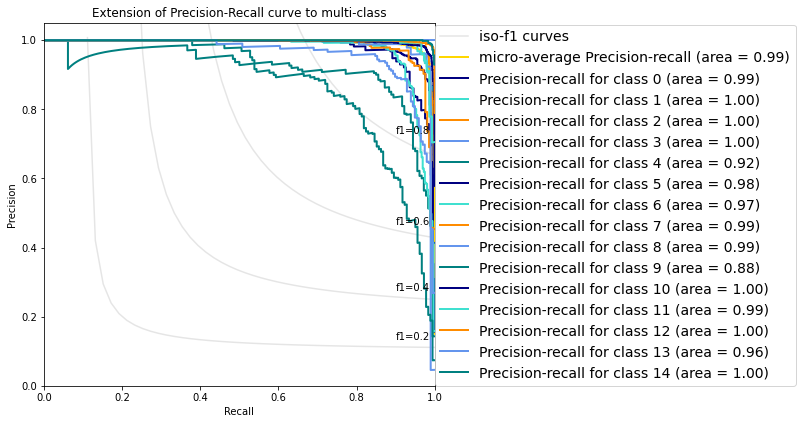

In [0]:
precision_recall_curve(precision, recall, average_precision)

In [0]:
classes

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Fragrance': 5,
 'Innerwear': 6,
 'Jewellery': 7,
 'Lips': 8,
 'Sandal': 9,
 'Shoes': 10,
 'Socks': 11,
 'Topwear': 12,
 'Wallets': 13,
 'Watches': 14}

## 8. gender+masterCategory Classification Model

### 8.1 Model Training

In [0]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_model_name = 'vgg19_transfer_genderMaster.h5'
# save_model_name = 'vgg19_transfer_subcat.h5'
# save_model_name = 'vgg19_transfer_articleType.h5'
# filepath = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/'
filepath = '/content/gdrive/My Drive/BT5153_AML_Group_Project/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
start = time.time()
vgg19_history = transfer_model.fit_generator(training_generator, steps_per_epoch=training_samples // batch_size,
                                            epochs=50,
                                            validation_data=validation_generator,
                                            validation_steps=validation_samples // batch_size, # class_weight = class_weights,
                                            callbacks=[earlyStopping, best_model, reduce_lr_loss]) 
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Epoch 1/50
880/880 [==============================] - 61s 70ms/step - loss: 1.2540 - accuracy: 0.5733 - val_loss: 0.9497 - val_accuracy: 0.7318

Epoch 00001: val_accuracy improved from -inf to 0.73182, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_genderMaster.h5
Epoch 2/50
880/880 [==============================] - 61s 70ms/step - loss: 0.8087 - accuracy: 0.7229 - val_loss: 0.6351 - val_accuracy: 0.7689

Epoch 00002: val_accuracy improved from 0.73182 to 0.76890, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_genderMaster.h5
Epoch 3/50
880/880 [==============================] - 61s 69ms/step - loss: 0.6945 - accuracy: 0.7597 - val_loss: 0.4974 - val_accuracy: 0.7872

Epoch 00003: val_accuracy improved from 0.76890 to 0.78716, saving model to /content/gdrive/My Drive/BT5153_AML_Group_Project/vgg19_transfer_genderMaster.h5
Epoch 4/50
880/880 [==============================] - 61s 70ms/step - loss: 0.6370 - accuracy: 0.

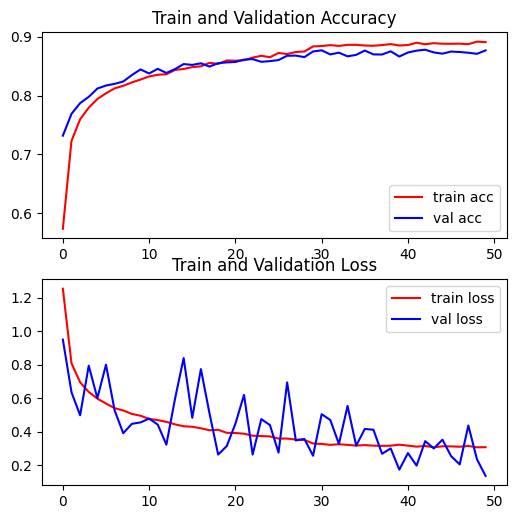

In [0]:
# plot train and valid loss history 
vgg19_valid_acc_plot = plot_acc_loss(vgg19_history)

In [0]:
# evaluate model, return loss & metrics values in the test mode
transfer_model.evaluate(validation_generator)

221/221 [==============================] - 12s 53ms/step


[0.23939508199691772, 0.8710593581199646]

In [0]:
# prediction for test dataset
test_pred = transfer_model.predict(test_generator)

In [0]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, batch_size)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, test_samples), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(8804,) (8804,) 0.8839164016356201
[ 4 10  9 10  5  4  3  5 10  3  4  4  3  5 12  5  9  5  9  3  5  4  9  7]
[ 4 10  9 10  5  4  3  5 10  7  4 10  3  5 12  5  9  5  9  3  5  4  9  7]


In [0]:
# test dataset accuracy
transfer_model.evaluate(test_generator)

276/276 [==============================] - 5s 17ms/step


[0.0038209683261811733, 0.8839163780212402]

### 8.2 Evaluation of Model

#### Confusion Matrix

In [0]:
# confusion matrix for multiclass prediction results
# del test_pred, test_true
test_pred = transfer_model.predict(test_generator)
test_true = truth_labels(test_generator, batch_size)
classes = validation_generator.class_indices
test_pred_top1 = pred_class(test_pred)
test_true_top1 = pred_class(test_true)
acc_test = acc_cal(test_pred_top1, test_true_top1)
print('Test accuracy = ',acc_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_true_top1, test_pred_top1)
print('Confusion matrix for test dataset')
print(cnf_matrix)

Test accuracy =  0.8839164016356201
Confusion matrix for test dataset
[[ 125    7    0   21    1    0    0    0    1    2    1    0]
 [  18   70    0   12    0    0    1    0    7    9    0    0]
 [   0    0  743    3    3    0   23    0   75    0    2    2]
 [  27    7    1 2220    0    1    0    0    2   28    0    0]
 [   0    0    0    1 1142    0    1    3    3    4   22    0]
 [   2    0    0    0    0   86    0    0    4    0    0   18]
 [   0    1   68    2    1    0  194    0   59    1    1    1]
 [   0    0    1    0   83    0    0   20    3    0   14    0]
 [   1    1   95    3    1    2   14    0  924   15    1    6]
 [   2   16    2  104    2    0    2    0    9 1556    0    2]
 [   0    0    0    0  152    0    0    3    1    0  391    1]
 [   1    2    0    0    0   23    2    0   10    1    1  311]]


Normalized confusion matrix


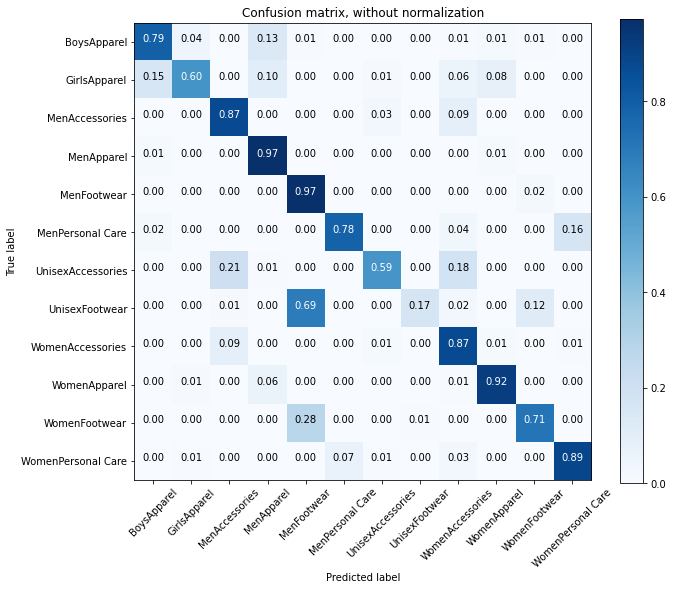

In [0]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix, without normalization')

#### Precision_Recall_Curve

In [0]:
precision, recall, average_precision = precision_recall_cal(test_true, test_pred, n_classes)

Average precision score, micro-averaged over all classes: 0.95


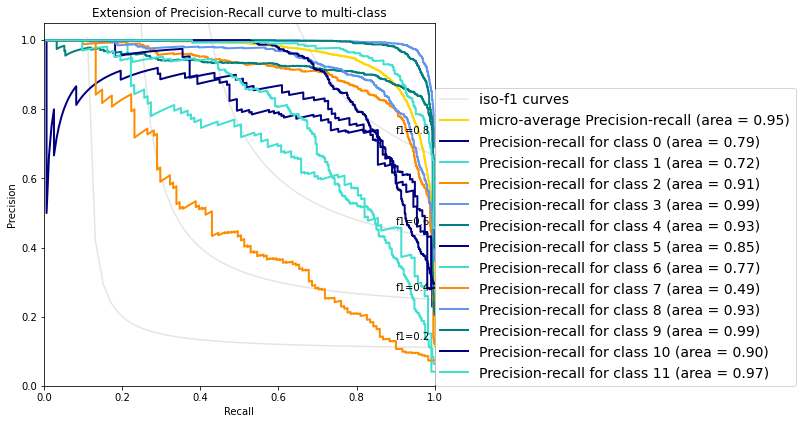

In [0]:
precision_recall_curve(precision, recall, average_precision)

In [0]:
classes

{'BoysApparel': 0,
 'GirlsApparel': 1,
 'MenAccessories': 2,
 'MenApparel': 3,
 'MenFootwear': 4,
 'MenPersonal Care': 5,
 'UnisexAccessories': 6,
 'UnisexFootwear': 7,
 'WomenAccessories': 8,
 'WomenApparel': 9,
 'WomenFootwear': 10,
 'WomenPersonal Care': 11}

### References:
[1] Dataset source:

https://www.kaggle.com/paramaggarwal/fashion-product-images-small

[2] image_generator:

https://www.kaggle.com/paramaggarwal/fashion-product-images-classifier

https://keras.io/preprocessing/image/

[3] How can i predict images(outside dataset) using VGG16 with keras after training?

https://stackoverflow.com/questions/59331348/how-can-i-predict-imagesoutside-dataset-using-vgg16-with-keras-after-training

[4] How to Classify Fashion Images easily using ConvNets

https://medium.com/nanonets/how-to-classify-fashion-images-easily-using-convnets-81e1e0019ffe

[5] Transfer Learning in Keras with Computer Vision Models

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

[6] How to use SMOTE for dealing with imbalanced image dataset for solving classification problems

https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad

[7] 2. Over-sampling

https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

[8] Machine Learning — Multiclass Classification with Imbalanced Dataset

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a